In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from PIL import Image, ImageDraw

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [2]:
actual_st = pd.read_parquet("./stations/actual_stations.parquet")
actual_st['sis'] = actual_st['sis'].astype(int)
all_st = pd.read_parquet("./stations/all_stations.parquet")
all_st['sis'] = all_st['sis'].astype(int)
df_merge = pd.merge(actual_st, all_st, on='sis')
df_merge['lon_y'] = df_merge['lon_y'].replace(',', '.', regex=True).astype('float')
# actual_st['lon_e'] = actual_st['lon_y'].apply(lambda x: x if x>0 else x+360)
df_merge['lat_y'] = df_merge['lat_y'].replace(',', '.', regex=True).astype('float')
df_merge['diff_lat'] = df_merge['lat_x'] - df_merge['lat_y']
df_merge['diff_lon'] = df_merge['lon_x'] - df_merge['lon_y']
# actual_st = actual_st[actual_st.columns.to_list()[]]
actual_st = actual_st.sort_values(by=['lat'], ascending=False)
df_merge = df_merge.sort_values(by=['lat_x'], ascending=False)
actual_st.reset_index(drop=True, inplace=True)
actual_st

,name,sis,lat,lon
0,Фуглойкалвен фьорд,1034,70.317000,20.150000
1,Торсваг фьорд,1033,70.245560,19.500280
2,Верхнедвинск,26554,55.820830,27.940000
3,Полоцк,26653,55.474720,28.751670
4,Шарковщина,26643,55.363060,27.456670
5,Витебск,26666,55.252780,30.249170
6,Лынтуры,26645,55.048890,26.306940
7,Докшицы,26657,54.887220,27.760560
8,Лепель,26659,54.880000,28.704720
9,Сенно,26668,54.804440,29.687500


In [3]:
df_merge = df_merge[['name_x', 'sis', 'lat_x', 'lon_y', 'name_y', 'country']]
df_merge.columns = ['name', 'sis', 'lat', 'lon', 'name_en', 'country']
df_merge.head()


,name,sis,lat,lon,name_en,country
2,Фуглойкалвен фьорд,1034,70.31700,20.2,Fugloykalven Fyr,Norway
1,Торсваг фьорд,1033,70.24556,19.5,Torsvag Fyr,Norway
35,Верхнедвинск,26554,55.82083,27.9,Верхнедвинск,Беларусь
38,Полоцк,26653,55.47472,28.8,Полоцк,Беларусь
34,Шарковщина,26643,55.36306,27.5,Шарковщина,Беларусь


In [5]:
actual_st = df_merge

In [6]:
actual_st.shape

(86, 6)

In [7]:
lon = actual_st['lon'].values
lat = actual_st['lat'].values
lon[:2], lat[:2]

(array([20.2, 19.5]), array([70.317  , 70.24556]))

In [8]:
lon.max(), lon.mean(), lon.min(), (lon.max()+lon.min())/2

(78.7, 38.79651162790697, 19.5, 49.1)

In [9]:
margin = 0
FIGDPI = 100
lons_min = lon.min() - margin
lons_max = lon.max() + margin if lon.max() < 180 else lon.max()
lats_min = lat.min() - margin
lats_max = lat.max() + margin
lons_min, lons_max, lats_min, lats_max

(19.5, 78.7, 38.45, 70.317)

In [10]:
# TODO Rename this here and in `draw_map`
def _extracted_from_draw_map_19(m, projection, zoom, img_write=False):
        # plt.rcParams['figure.dpi'] = 100
        # # plt.rcParams['figure.figsize'] = (10.24, 10.24)
        # plt.rcParams['figure.figsize'] = (2.56 * zoom, 2.56 * zoom)
        # plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
        #     hspace = 0, wspace = 0)
        # plt.margins(0,0)
        plt.axis('off')
        m.drawcoastlines(linewidth=0.5, color='blue')
        m.fillcontinents(color='gray', lake_color='aqua')
        m.drawcountries(linewidth=0.5, color='black')
        # m.drawmapboundary(fill_color='aqua')
        # m.drawparallels(np.arange(-90., 91., 15.))
        # m.drawmeridians(np.arange(-180., 181., 30.))
        # m.shadedrelief()
        print(f"LON_LAT: {lon[0], lat[0]}")
        lons, lats = m(lon, lat, 
                #        inverse=True
                       )
        print(lons[0], lats[0])
        
        x, y = m(lon, lat, 
                #        inverse=True
                       )
        print(f"X_Y: {x[0], y[0]}")
        m.scatter(x, y, 
                  marker = 'o', 
                  color='r', 
                  zorder=1, 
                  label=1,
                  s=zoom+1
                  )
        # if projection=='merc':
        #     plt.title("Mercator Projection")
        # #     plt.show()
        # elif projection=='npstere':
        #     plt.title("North Pole Projection")
        # #     plt.show()
        if img_write==True:
                plt.savefig(
                        f'test_proj_{projection}.png', 
                        bbox_inches='tight', 
                        pad_inches = 0)
        return m
def draw_map(
        lats_min=-80,
        lats_max=80,
        lons_min=-180,
        lons_max=180,
        resolution='i',
        projection='merc',
        zoom=1,
        img_write=False,
        ):        
        # fig = plt.gcf()
        # fig.get_size_inches()
        # fig.dpi
        global FIGDPI
        plt.rcParams['figure.dpi'] = FIGDPI
        # plt.rcParams['figure.figsize'] = (10.24, 10.24)
        plt.rcParams['figure.figsize'] = (2.56 * zoom, 2.56 * zoom)
        plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
        plt.margins(0,0)
        if projection=='merc':
                m = Basemap(
                        projection=projection,
                        llcrnrlat=lats_min,
                        urcrnrlat=lats_max,
                        llcrnrlon=lons_min,
                        urcrnrlon=lons_max,
                        # lat_ts=10,
                        resolution=resolution,
                        )
                return _extracted_from_draw_map_19(m, projection, zoom, img_write=img_write)
        elif projection=='npstere':
                m = Basemap(
                        projection='npstere',
                        resolution=resolution,
                        lon_0=0.,
                        boundinglat=10,                       
                )
                return _extracted_from_draw_map_19(m, projection, zoom, img_write=img_write)

LON_LAT: (20.2, 70.317)
22238.974856936158 4721117.630540022
X_Y: (22238.974856936158, 4721117.630540022)


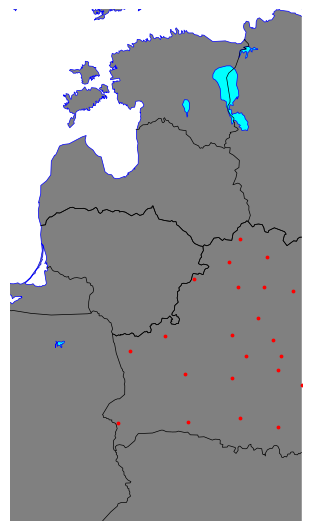

In [11]:
map_net_1_4 = [
    [70, 18, 71, 21],
    [50, 20, 60, 30],
    [38, 46, 40, 50],
    [40, 40, 46, 50],
    [37, 19, 72, 50],
    [-81.0, -170, 81.0, 170],
    [-81.0, 0, 81.0, 359.],
    [0., 180., 80., 360.],
    [0, 0, 80., 180.],
    [-80., 0., 0., 180.],
    [-80., 180., 0., 360.],
]
map_net_1_16 = [
    [45., 0., 60., 90.],
    [45., 90., 80., 180.],
    [45., 180., 80., 270.],
    [45., 270., 80., 360.],
    [0., 0., 45., 90.],
    [-45., 90., 45., 180.],
    [-45., 180., 45., 270.],
    [-45., 270., 45., 360.],
]
SLICE = 1
ZOOM = 2
projection = 'merc'
# projection = 'npstere'
# plt.rcParams['figure.figsize'] = (6,6)
map_ = draw_map(
    # map_net_1_16[SLICE][0],
    # map_net_1_16[SLICE][2],
    # map_net_1_16[SLICE][1],
    # map_net_1_16[SLICE][3],
    map_net_1_4[SLICE][0],
    map_net_1_4[SLICE][2],
    map_net_1_4[SLICE][1],
    map_net_1_4[SLICE][3],
    projection=projection,
    resolution='i',
    zoom=ZOOM,
    img_write=True,
    )

In [12]:
lon[0], lat[0]

(20.2, 70.317)

In [13]:
actual_st.iloc[:1,:]

,name,sis,lat,lon,name_en,country
2,Фуглойкалвен фьорд,1034,70.317,20.2,Fugloykalven Fyr,Norway


In [14]:
x, y = map_(lon, lat, inverse=False) # transform coordinates according to projection
x[:2], y[:2]

(array([ 22238.97485694, -55597.43714234]),
 array([4721117.63054002, 4697573.75558526]))

In [15]:
x.shape

(86,)

In [16]:
names = actual_st['name'].to_list()[:2]
names

['Фуглойкалвен фьорд', 'Торсваг фьорд']

In [17]:
# boxes = []
# for xa, ya, name in zip(x[:2], y[:2], names[:2]):
#     box = plt.text(xa, ya, name,
#         bbox=dict(facecolor='white', alpha=0.5))
#     boxes.append(box)
# midpoints = []
# F = plt.gcf()
# R = F.canvas.get_renderer()
# for box in boxes:
#     bb = box.get_window_extent(renderer=R)
#     midpoints.append((int((bb.p0[0] + bb.p1[0]) / 2),
#             int((bb.p0[1] + bb.p1[1]) / 2)))
# origin = plt.gca().transAxes.transform((0,0));
# padding = [FIGDPI*ZOOM, FIGDPI*ZOOM]
# im = Image.open(f'./test_proj_{projection}.png')
# draw = ImageDraw.Draw(im)
# for x, y in midpoints:
#     #  deal with shift
#     x = x-origin[0]+padding[0]
#     y = y-origin[1]+padding[1]
#     y = im.size[1] - y # PIL counts rows from top not bottom
#     draw.ellipse((x-5, y-5, x+5, y+5), fill="#ff0000")
# plt.imshow(im)

In [18]:
# img = Image.open(f'./test_proj_{projection}.png')
# skew_coef = 1
# PAD = 5
# # LOC_1, LOC_2 = 0, 1
# # LOC_1, LOC_2 = 2, 3
# # LOC_1, LOC_2 = 45, 46
# # LOC_1, LOC_2 = 43, 44
# # LOC_1, LOC_2 = -2, -1
# # LOC_1, LOC_2 = -4, -5
# LOC_1, LOC_2 = -7, -6
# print("MAP_SIZE: ", map_.lonmin, map_.lonmax, map_.latmin, map_.latmax)
# # st_1_lon, st_1_lat = map_(
# #     actual_st.iloc[LOC_1, 3],
# #     actual_st.iloc[LOC_1, 2],
# #     inverse=True
# #     )
# st_1_lon, st_1_lat =actual_st.iloc[LOC_1, 3], actual_st.iloc[LOC_1, 2]
# # st_1_lat, st_1_lon = map_(st_1_lat, st_1_lon,)
# print("ST_1: ",
#     actual_st.iloc[LOC_1, 2],
#     actual_st.iloc[LOC_1, 3],
# )
# print("ST_1: LAT, LON", st_1_lat, st_1_lon)
# # merge_st_1_lat = df_merge.iloc[LOC_1, 5]
# # merge_st_1_lon = df_merge.iloc[LOC_1, 6]
# # merge_st_1_lat, merge_st_1_lon
# # merge_st_2_lat = df_merge.iloc[LOC_2, 5]
# # merge_st_2_lon = df_merge.iloc[LOC_2, 6]
# # merge_st_2_lat, merge_st_2_lon
# print("ST_2: ",
#     actual_st.iloc[LOC_2, 2],
#     actual_st.iloc[LOC_2, 3],
# )
# # st_2_lon, st_2_lat = map_(
# #     actual_st.iloc[LOC_2, 3],
# #     actual_st.iloc[LOC_2, 2],
# #     inverse=True
# #     )
# st_2_lon, st_2_lat = actual_st.iloc[LOC_2, 3], actual_st.iloc[LOC_2, 2]
# x2, y2 = map_(st_2_lon, st_2_lat)
# st_2_lon_proj, st_2_lat_proj = map_(x2, y2, inverse=True)

# print(f"ST_2: {st_2_lat, st_2_lon}")
# print(f"ST_2_proj: {st_2_lat_proj, st_2_lon_proj}")
# x_1 = (img.size[0] / (map_.lonmax - map_.lonmin)) * (st_1_lon - map_.lonmin)
# y_1 = (img.size[1] / (map_.latmax - map_.latmin)) * (map_.latmax - st_1_lat) * skew_coef
# x_2 = (img.size[0] / (map_.lonmax - map_.lonmin)) * (st_2_lon - map_.lonmin)
# y_2 = (img.size[1] / (map_.latmax - map_.latmin)) * (map_.latmax - st_2_lat) * skew_coef
# print("X_1, Y_1,..", x_1, y_1)
# print("X_2, Y_2,..", x_2, y_2)
# print(img.size)
# # merge_x_1 = (img.size[0] / (map_.lonmax - map_.lonmin)) * (merge_st_1_lon - map_.lonmin)
# # merge_y_1 = (img.size[1] / (map_.latmax - map_.latmin)) * (map_.latmax - merge_st_1_lat) * skew_coef
# # merge_x_2 = (img.size[0] / (map_.lonmax - map_.lonmin)) * (merge_st_2_lon - map_.lonmin)
# # merge_y_2 = (img.size[1] / (map_.latmax - map_.latmin)) * (map_.latmax - merge_st_2_lat) * skew_coef
# plt.rcParams['figure.figsize'] = (6,6)
# draw = ImageDraw.Draw(img)
# draw.ellipse(((x_1) - PAD, (y_1) - PAD, (x_1) + PAD, (y_1) + PAD), outline = 'orange', fill =None, width=2)
# draw.ellipse(((x_2) - PAD, (y_2) - PAD, x_2 + PAD, y_2 + PAD), outline = 'orange', fill =None, width=2)
# # draw.ellipse((merge_x_1- PAD, (merge_y_1)- PAD, merge_x_1+ PAD, (merge_y_1)+ PAD), fill = 'magenta', outline ='magenta')
# # draw.ellipse((merge_x_2- PAD, merge_y_2- PAD, merge_x_2+ PAD, merge_y_2+ PAD), fill = 'magenta', outline ='magenta')
# plt.imshow(img)
# plt.xticks(range(0, img.size[0], 15), rotation=90);
# plt.yticks(range(0, img.size[1], 15));
# # plt.grid(True)
# plt.show()
# img.size, img.size[0]/img.size[1], img.size[1]/img.size[0]

In [84]:
counties = actual_st['country'].unique().tolist()
print(counties)
skew_coef = 1
PAD = 5
PADDING = 1
df_filter = actual_st[actual_st['country']==counties[6]]
country_act = df_filter['country'].unique()[0]
country_act
# df_filter

['Norway', 'Беларусь', 'Украина', 'Грузия', 'Азербайджан', 'Армения', 'Кыргызстан']


'Кыргызстан'

LON_LAT: (20.2, 70.317)
-6315868.859369891 6443791.292206371
X_Y: (-6315868.859369891, 6443791.292206371)


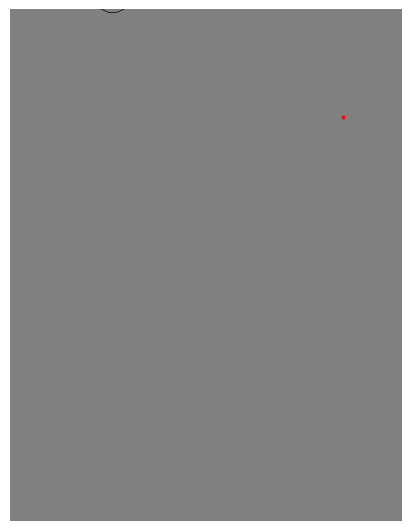

In [85]:
map_ = draw_map(
    int(df_filter['lat'].min() - PADDING),
    int(df_filter['lat'].max() + PADDING),
    int(df_filter['lon'].min() - PADDING),
    int(df_filter['lon'].max() + PADDING),
    projection=projection,
    resolution='i',
    zoom=ZOOM,
    img_write=True,
    )

/tmp/ipykernel_114806/3535813335.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  st_lats_lons = df_filter[(actual_st['lon'] >= map_.lonmin)\


MAP_SIZE:  77.0 79.0 39.0 41.0


100%|██████████| 1/1 [00:00<00:00, 875.45it/s]


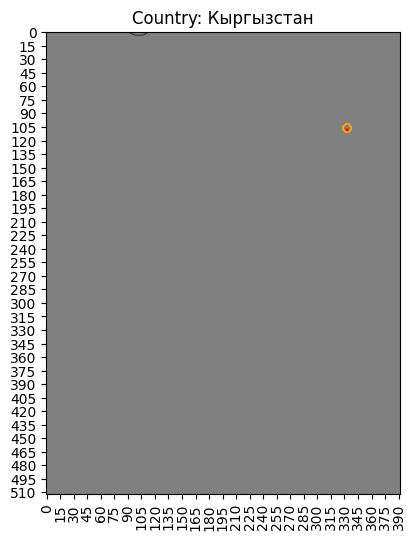

((392, 512), 0.765625, 1.3061224489795917)

In [86]:
img = Image.open(f'./test_proj_{projection}.png')
# LOC_1, LOC_2 = -7, -6
print("MAP_SIZE: ", map_.lonmin, map_.lonmax, map_.latmin, map_.latmax)
st_lats_lons = df_filter[(actual_st['lon'] >= map_.lonmin)\
    & (df_filter['lon'] <= map_.lonmax)\
        & (df_filter['lat'] >= map_.latmin)\
            & (df_filter['lat'] <= map_.latmax)].loc[:, ['lat', 'lon']].values
# st_lats_lons.shape
from tqdm import tqdm
plt.rcParams['figure.figsize'] = (6,6)
draw = ImageDraw.Draw(img)
for lat_st, lon_st in tqdm(st_lats_lons):
    xx, yy = map_(lon_st, lat_st)
    lon_st, lat_st = map_(xx, yy, inverse=True)
    x_1 = (img.size[0] / (map_.lonmax - map_.lonmin)) * (lon_st - map_.lonmin)
    y_1 = (img.size[1] / (map_.latmax - map_.latmin)) * (map_.latmax - lat_st)
    draw.ellipse(((x_1) - PAD, (y_1) - PAD, (x_1) + PAD, (y_1) + PAD), outline = 'orange', fill =None, width=2)
plt.imshow(img)
plt.xticks(range(0, img.size[0], 15), rotation=90);
plt.yticks(range(0, img.size[1], 15));
# plt.grid(True)
plt.title(f"Country: {country_act}")
plt.show()
img.size, img.size[0]/img.size[1], img.size[1]/img.size[0]